<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/RN_clasificacion_imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow keras


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:

# Verificar si GPU está disponible
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


GPU is available


In [6]:
# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar los valores de los píxeles a un rango de 0 a 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 4s 0us/step


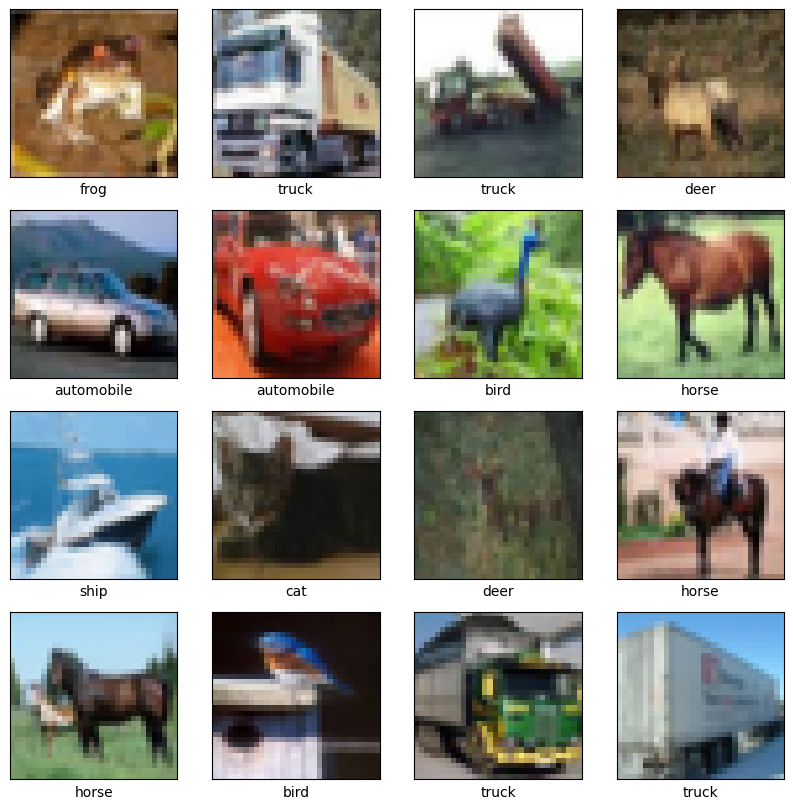

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [12]:

# Configurar callbacks para guardar checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cnn_model.h5", save_best_only=True)


In [13]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9897 - accuracy: 0.6529 - val_loss: 0.9733 - val_accuracy: 0.6601
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8860 - accuracy: 0.6883 - val_loss: 0.9952 - val_accuracy: 0.6510
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8148 - accuracy: 0.7138 - val_loss: 0.9083 - val_accuracy: 0.6883
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7535 - accuracy: 0.7347 - val_loss: 0.8822 - val_accuracy: 0.6993
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7015 - accuracy: 0.7548 - val_loss: 0.8753 - val_accuracy: 0.7001
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6541 - accuracy: 0.7714 - val_loss: 0.9450 - val_accuracy: 0.6836
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6120 - accuracy: 0.7850 - val_loss: 0.8666 - val_accuracy:

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - loss: 0.9288 - accuracy: 0.7025 - 677ms/epoch - 2ms/step
Test accuracy: 0.7024999856948853


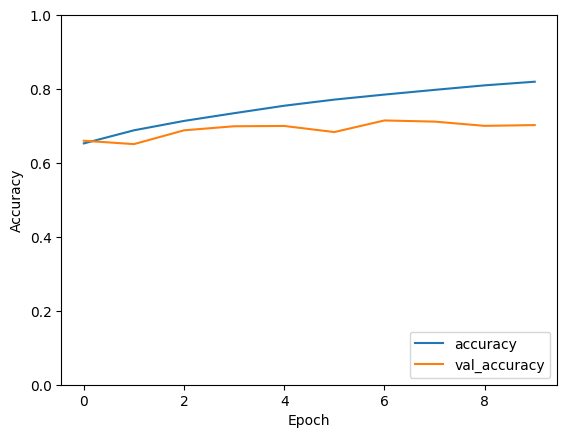

In [15]:
# Visualizar la precisión y la pérdida
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()